In [10]:
"""
April 09, 2020

Birte Schmidtmann (birte.schmidtmann@uni-hamburg.de)

GNU General Public License
"""

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import os as os
import pandas as pd
import plotly.graph_objects as go

In [11]:
# initial conditions for:
# N=1000
# L0 = 10 # latent
# Im0 = 0 # mild infected 
# I0 = 0 # infected
# H0 = 0 # hospitalized
# ICU0 = 0 # in intensive care units
# R0 = 0 # recoverd
# D0 = 0 # dead
# Q0 = 0 # quarantined or self-/home-isolated
# S0 = N - L0 - Im0 - I0 -H0 -ICU0 - R0 -D0 -Q0 # susceptible
#
# Hamburg:
N = 1841179
L0 = 1500
Im0 = 1057
Is0 = 1057
H0 = 793
ICU0 = 264
R0 = 1493
D0 = 23
Q0 = int(0.01*N)
S0 = N - L0 - Im0 - I0 -H0 -ICU0 - R0 -D0 -Q0 # susceptible
#----- time steps -----
#
tsteps = 60 # number  of timesteps of simulation (days)
t = np.linspace(1, tsteps, 10*tsteps) # time steps (days) 
#
#----- parameter -----
#
beta1 = 3.0  # attack rate, [beta]=1/time
beta2 = 0.3
beta3 = 0.3
beta4 = 0.1
beta5 = 0.05
gamma1 = 1./3. # recovery rate, [gamma]=1/time
gamma2 = 1./3.
gamma3 = 1./3.
gamma4 = 1./3.
alpha1 = 0.2
alpha2 = 0.5
alpha3 = 0.2
eps1 = 0.2
eps2 = 0.1
eps3 = 0.7
delta1 = 0.01
delta2 = 0.05
kappa_m = 0.8
kappa_s = 0.2
kappa_H = 0.2
kappa_ICU = 0.1
kappa_Q = 0.01

In [12]:
def dydt(y, t):
    
    S, L, Im, Is, H, ICU, R, D, Q = y
    
    dSdt   = -beta1*S/N*(L+kappa_m*Im+kappa_s*Is+kappa_H*H+kappa_ICU*ICU+kappa_Q*Q)
#     dSdt   = -beta1*L*S/N
    dLdt   =  beta1*S/N*(L+kappa_m*Im+kappa_s*Is+kappa_H*H+kappa_ICU*ICU+kappa_Q*Q) - beta2*L - alpha1*L
#     dLdt   =  beta1*L*S/N - beta2*L - alpha1*L
    dImdt  =  beta2*L - beta3*Im - gamma1*Im - alpha2*Im
    dIsdt  =  beta3*Im - beta4*Is - gamma2*Is - alpha3*Is
    dHdt   =  beta4*Is - beta5*H + eps1*Q - gamma3*H - delta1*H
    dICUdt =  beta5*H - gamma4*ICU + eps2*Q - delta2*ICU
    dRdt   =  gamma1*Im + gamma2*Is + gamma3*H + gamma4*ICU + eps3*Q
    dDdt   =  delta1*H + delta2*ICU
    dQdt   =  alpha1*L + alpha2*Im + alpha3*Is - eps1*Q - eps2*Q - eps3*Q
    
    return [dSdt, dLdt, dImdt, dIsdt, dHdt, dICUdt, dRdt, dDdt, dQdt]

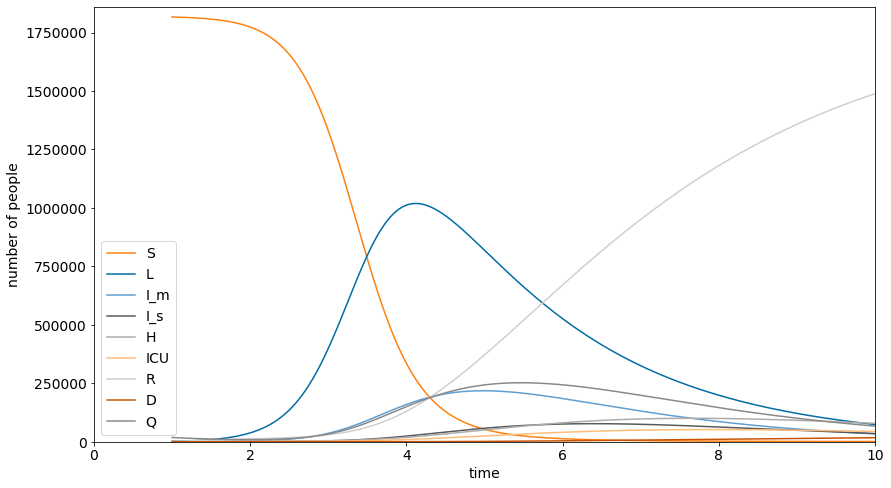

In [21]:
# Initial conditions vector (staring conditions)
y0 = [S0, L0, Im0, Is0, H0, ICU0, R0, D0, Q0]
#print(y01)
#y0  = [x0/N for x0 in y01]

# Integrate the differential equations over the time grid t
sol2 = odeint(dydt, y0, t)
[S2,L2,Im2,Is2,H2,ICU2,R2,D2,Q2]=sol2.T
    
# color options
# these are Tablea's "Color Blind 10" colors in RGB
colorBlind10 = [(255,128,14),(171,171,171),(95,158,209),(89,89,89),(0,107,164),
                (255,188,121),(207,207,207),(200,82,0),(162,200,236),(137,137,137)]
    
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(colorBlind10)):    
    r, g, b = colorBlind10[i]    
    colorBlind10[i] = (r / 255., g / 255., b / 255.) 

TendPlot = 10
t = np.linspace(1, TendPlot, 10*tsteps)        
# plot the solution
fig, ax = plt.subplots(figsize=(14,8))    
ax.set_xlabel('time',fontsize=14)
ax.set_ylabel('number of people',fontsize=14)
plt.xlim(0, TendPlot)  
plt.ylim(-1,N+N*1/100)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.plot(t, S, label='S',color=colorBlind10[0])
# plt.plot(t, L, label='L',color=colorBlind10[4])
# plt.plot(t, Im, label='I_m',color=colorBlind10[2])
# plt.plot(t, Is, label='I_s',color=colorBlind10[3])
# plt.plot(t, H, label='H',color=colorBlind10[1])
# plt.plot(t, ICU, label='ICU',color=colorBlind10[5])
# plt.plot(t, R, label='R',color=colorBlind10[6])
# plt.plot(t, D, label='D',color=colorBlind10[7])
# plt.plot(t, Q, label='Q',color=colorBlind10[9])

# plt.plot(t, S2, '--', label='S',color=colorBlind10[0])
# plt.plot(t, L2, '--', label='L',color=colorBlind10[4])
# plt.plot(t, Im2, '--', label='I_m',color=colorBlind10[2])
# plt.plot(t, I2, '--', label='I_s',color=colorBlind10[3])
# plt.plot(t, H2, '--', label='H',color=colorBlind10[1])
# plt.plot(t, ICU2, '--', label='ICU',color=colorBlind10[5])
# plt.plot(t, R2, '--', label='R',color=colorBlind10[6])
# plt.plot(t, D2, '--', label='D',color=colorBlind10[7])
# plt.plot(t, Q2, '--', label='Q',color=colorBlind10[9])

ax.plot(t, S2, label='S',color=colorBlind10[0])
ax.plot(t, L2, label='L',color=colorBlind10[4])
ax.plot(t, Im2, label='I_m',color=colorBlind10[2])
ax.plot(t, Is2, label='I_s',color=colorBlind10[3])
ax.plot(t, H2, label='H',color=colorBlind10[1])
ax.plot(t, ICU2, label='ICU',color=colorBlind10[5])
ax.plot(t, R2, label='R',color=colorBlind10[6])
ax.plot(t, D2, label='D',color=colorBlind10[7])
ax.plot(t, Q2, label='Q',color=colorBlind10[9])

ax.legend(fontsize=14)
ax.savefig('complexSIR4.pdf')

In [7]:
# Create example slider figure from https://plotly.com/python/sliders/
fig = go.Figure()

# Add traces, one for each slider step
for step in np.arange(0, 1, 0.1):
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=2),
            name="β = " + str(step),
            x=t,
            y= (1-step)*S + step*R
            
            #fig.xlim(0, tsteps)  
            #fig.ylim(-1,N+N*1/100)
                  )
                 )

fig.update_layout(
    title={
        'text': "SIR",
        'y':0.87,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="time [days]",
    yaxis_title="number of people",
    font=dict(
        family="Courier New",
        size=18,
        color="#7f7f7f"
    )
)    
# Make 10th trace visible
fig.data[5].visible = True

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="restyle",
        args=["visible", [False] * len(fig.data)],
    )
    step["args"][1][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=10,
    currentvalue={"prefix": "β= "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()

NameError: name 'S' is not defined